<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/9%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_RNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [18]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [19]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# 5. RNN 모델 구축
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 12, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 6. RNN 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 7.2054e-04
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.00

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


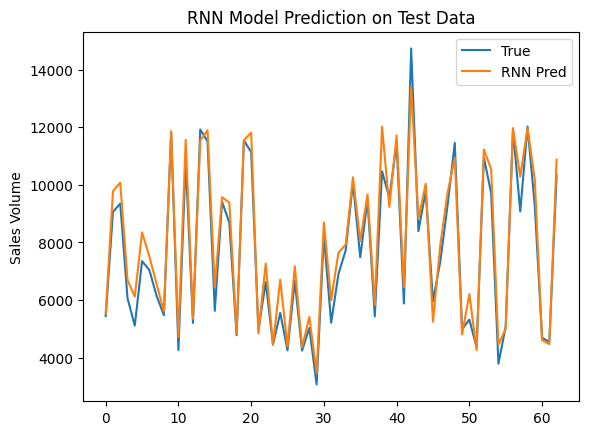

In [32]:
# 7. RNN 모델 예측 및 시각화 (테스트 데이터 사용)
pred_rnn = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred_rnn), label='RNN Pred')
plt.legend(); plt.title('RNN Model Prediction on Test Data'); plt.ylabel('Sales Volume'); plt.show()

In [28]:
# 4. LSTM 모델 구축 및 훈련
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
modelLSTM.compile(optimizer='adam', loss='mse')
history_lstm = modelLSTM.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0763 - val_loss: 0.0106
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0070
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0076
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064 - val_loss: 0.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


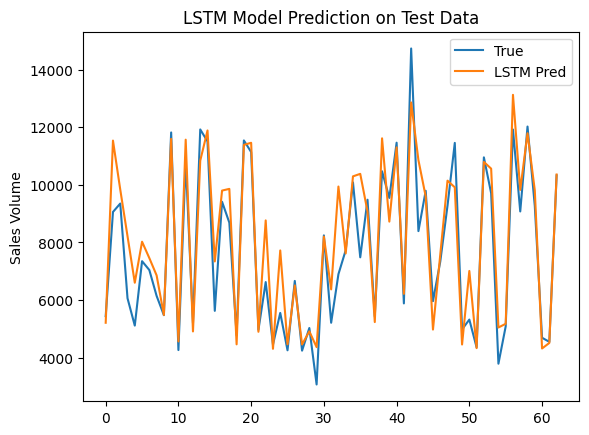

In [33]:
# 7. LSTM 모델 예측 및 시각화 (테스트 데이터 사용)
pred_lstm = modelLSTM.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred_lstm), label='LSTM Pred')
plt.legend(); plt.title('LSTM Model Prediction on Test Data'); plt.ylabel('Sales Volume'); plt.show()

In [35]:
display(df['S4248SM144NCEN'].describe())

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RNN 모델 MSE 및 RMSE 계산
mse_rnn = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(pred_rnn))
rmse_rnn = np.sqrt(mse_rnn)
print(f"RNN 모델의 MSE: {mse_rnn}")
print(f"RNN 모델의 RMSE: {rmse_rnn}")

# LSTM 모델 MSE 및 RMSE 계산
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(pred_lstm))
rmse_lstm = np.sqrt(mse_lstm)
print(f"LSTM 모델의 MSE: {mse_lstm}")
print(f"LSTM 모델의 RMSE: {rmse_lstm}")

RNN 모델의 MSE: 342648.4352732055
RNN 모델의 RMSE: 585.3617986110859
LSTM 모델의 MSE: 1195563.7463239036
LSTM 모델의 RMSE: 1093.4183766170677
